# Can contamination explain the Rayleigh-like signal

Flux contamination by an unresolved source leads to a wavelength-dependent signal in the transit depth. We need to check if this signal can explain the Rayleigh-like increase in the radius ratio towards blue.

The contamination is expressed as a fraction of the contaminant flux from the total flux.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from core import *
from exotk.utils.eclipses import Planck

fwl = linspace(500,950,100)
wlm = 1e-9*fwl

In [3]:
def contamination(wl,c0,Ts,Tc,return_components=False):
    flux_s = Planck(Ts, wl)
    flux_c = Planck(Tc, wl)
    
    flux_s = (1-c0)* (flux_s/flux_s[0])
    flux_c =    c0 * (flux_c/flux_c[0]) 
    flux_t  = flux_c + flux_s
    
    if not return_components:
        return flux_c / flux_t
    else: 
        return flux_t, flux_s, flux_c
    
    
def contaminated_k(wl, k0, Tc, c0, Ts):
    return k0*sqrt(1-contamination(wl, c0, Ts, Tc))

def spotty_k(wl, k0, Tstar, f, DeltaT):
    """
    Modified radius ratio due to unocculted spots.
    
    Parameters
    
      wl     : wavelength [m]
      k0     : true geometric radius ratio
      Tstar  : effective stellar temperature [K]
      f      : spot filling factor
      DeltaT : spot temperature difference [K]
    """
    Tspot    = Tstar - DeltaT
    fratio   = Planck(Tspot,wl)/Planck(Tstar,wl)
    contrast = 1 - fratio
    
    return k0*sqrt(1/(1-f*contrast))

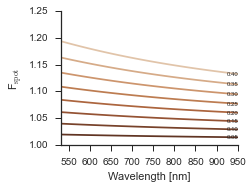

In [4]:
with sb.axes_style('ticks'):
    fig, ax = subplots(1,1,figsize=(AAOCW,0.75*AAOCW))
    for i,f in enumerate(linspace(0.05,0.4,8)):
        c = sb.desaturate(cm.Oranges_r(i/10.), 0.5)
        k_spot = spotty_k(wlm, 1, TSTAR, f, 1250)
        ax.plot(fwl, k_spot, c=c)
        ax.text(925, k_spot[-1], '{:4.2f}'.format(f), va='center')
setp(ax, xlim=(530,950), xlabel='Wavelength [nm]', ylabel='F$_\mathrm{spot}$')
sb.despine(fig)
fig.tight_layout()
fig.savefig('plots/unocculted_spots.pdf')

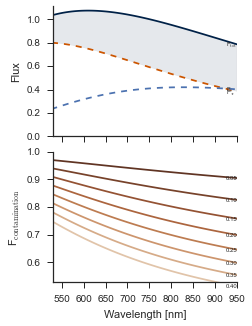

In [5]:
Tc, c0 = 3500, 0.20
ft,fs,fc = contamination(fwl*1e-9, c0, TSTAR, Tc, return_components=True)

with sb.axes_style('ticks'):
    fig, ax = subplots(2,1,figsize=(AAOCW,1.3*AAOCW), sharex=True)
    ax[0].plot(fwl, ft)
    ax[0].plot(fwl, fs, '--')
    ax[0].plot(fwl, fc, '--')
    ax[0].fill_between(fwl, fs, ft, alpha=0.1)
    ax[0].text(925, fc[-1], 'F$_c$', ha='left', va='center')
    ax[0].text(925, fs[-1], 'F$_\star$', ha='left', va='center')
    ax[0].text(925, ft[-1], 'F$_\mathrm{tot}$', ha='left', va='center')
    
    for i,cnt in enumerate(linspace(0.05,0.4,8)):
        c = sb.desaturate(cm.Oranges_r(i/10.), 0.5)
        k_cnt = contaminated_k(wlm, 1, Tc, cnt, TSTAR)
        ax[1].plot(fwl, k_cnt, c=c)
        ax[1].text(925, k_cnt[-1], '{:4.2f}'.format(cnt), va='center')
        
sb.despine(fig)
setp(ax[0], ylim=(0,1.11), ylabel='Flux')
setp(ax[1], xlabel='Wavelength [nm]', ylabel=r'F$_\mathrm{contamination}$', 
     xlim=(530,950), ylim=(0.53,1.0))
fig.tight_layout()
fig.savefig('plots/contamination.pdf')

---

<center> &copy; 2015 <a href="mailto:hannu.parviainen@physics.ox.ac.uk">Hannu Parviainen</a></center>